# Informe Técnico - Examen Transversal: Caso Monopoly


Integrantes:
* Diego Muñoz
* Marco Maulen

Docente: Carlos Eduardo Correa Sanhueza

Sección: 003V

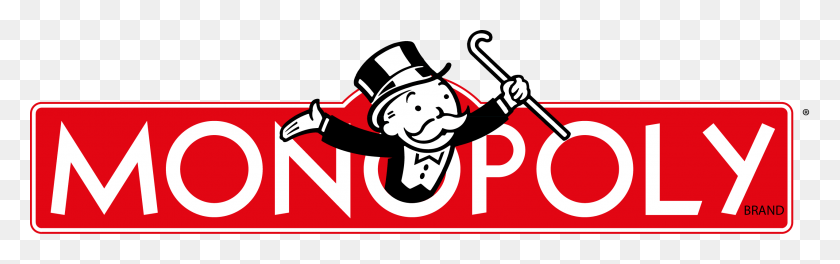

# Caso Fundamentos de Machine Learning

El banco Monopoly lleva muchos años atendiendo a sus clientes en Chile y recientemente
ha sido adquirido por un Banco con capitales extranjeros llamado “Dormammu”.
Dormammu ha encargado a sus ingenieros hacer estudios sobre los clientes del banco
Monopoly, para conocer su comportamiento y detectar patrones. Además, debe analizar
cómo será su estrategia para abordar estos nuevos clientes dado el uso que ellos hacen de
sus productos financieros.
Los ingenieros del área informática del banco Monopoly han extraído una base de datos
según una solicitud recibida por el nuevo dueño del banco y la han compartido con los
ingenieros de Dormammu que están en la sede de New York. La base contiene una muestra
de clientes con 12 meses de información almacenada en variables mensuales por cada
cliente.
Usted es parte del equipo de ingenieros del banco Dormammu, y con sus colegas debe
analizar esta base, limpiarla, seleccionar las variables que sirvan para alguna interpretación
y entregar la mayor información posible a los dueños de este banco para que puedan
conocer a los clientes, preparar una estrategia y abordar a este nuevo mercado.
La base de datos tiene variables asociadas a información del cliente y variables mensuales,
es decir una por cada mes, el cliente no se repite y las variables asociadas se van agregando
como una columna más. Con esto, la base de datos tiene 574 variables y 51.124 registros.
La descripción de las variables se muestra a continuación:




## Fase 1: Business Understanding

El banco Monopoly, una institución financiera en Chile, ha experimentado un cambio significativo al ser adquirido por el banco extranjero "Dormammu". Dormammu ha asignado ingenieros para estudiar el comportamiento de los clientes de Monopoly y detectar patrones clave en sus actividades financieras. Este análisis ayudará a comprender mejor las necesidades y preferencias de los clientes. Además, Dormammu está formulando una estrategia adaptada para abordar a estos nuevos clientes, teniendo en cuenta su uso actual de productos financieros. Esta adquisición promete cambios emocionantes en el panorama bancario chileno, con la posibilidad de ofrecer una gama más amplia de servicios. La base de datos tiene variables asociadas a información del cliente y variables mensuales,
es decir una por cada mes, el cliente no se repite y las variables asociadas se van agregando
como una columna más. Con esto, la base de datos tiene **574 variables y 51.124 registros**.

**Hipotesis de negocio**:
se busca aprovechar el análisis de datos de clientes para mejorar la rentabilidad y expandir el mercado financiero. La estrategia se centra en la personalización de servicios, retención de clientes, adquisición de nuevos clientes y optimización de la gestión del riesgo crediticio. Además, al comprender mejor las necesidades y preferencias de nuestros clientes, podemos optimizar la gestión del riesgo crediticio y aumentar la eficiencia operativa del banco."

**Tarea de clasificacion:**
sería construir un modelo de clasificación binaria que prediga si un cliente pagará solo el monto mínimo de la deuda (1) o pagará la totalidad del monto de la deuda (0) en función de otras características y variables del cliente. Esto podría ayudar a identificar patrones de comportamiento de pago y riesgo crediticio. Utilizaremos la variable "target" como objetivo

**Tarea de regresion**:
Crear un modelo que nos permita realizar tareas de regresión para predecir el cupo de tarjeta de crédito que un cliente podría recibir en función de su historial crediticio, ingresos, edad y otras variables relacionadas. Utilizaremos la variable "renta" como variable objetivo.

## Fase 2: Data Understanding

La fase de entendimiento es muy importante, pues en esta fase entenderemos los datos y como se comportan, para esto, estaremos analizando diferente tipos de datos con diferentes funcionalidades ya sean graficos de barra entre otros.

In [ ]:
# Importar Librerias.
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import seaborn as sb
import matplotlib.pyplot as plt
from seaborn import boxplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

En primer lugar importamos las librerias que utilizaremos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lectura.
archivo_csv = '/content/drive/MyDrive/Colab Notebooks/Base_clientes_Monopoly.xlsx'
df = pd.read_excel(archivo_csv)

Luego cargamos la base de datos.


In [ ]:
# Visualizar datos.
print(df.shape)
df.head()

(51124, 574)


,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0


In [ ]:
df.shape

(51124, 574)

Una vez cargados visualizamos los datos para cerciorarnos de que esten correctamente cargados y empezar a analizar.


In [ ]:
#Medidas de posicion y medidas de tendencia central.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,51124.0,25562.500000,14758.371918,1.00,12781.75,25562.5,38343.25,51124.00
Subsegmento,51124.0,182.024274,29.276596,151.00,160.00,170.0,210.00,959.00
Region,51071.0,10.828220,3.392703,1.00,9.00,13.0,13.00,13.00
Edad,51124.0,38.702879,13.302573,9.00,28.00,35.0,46.00,104.00
Renta,37759.0,663077.078726,409279.460268,1.00,419999.00,567012.0,814903.50,13089327.00
...,...,...,...,...,...,...,...,...
EeccInt_T01,51124.0,7.323155,108.161194,-7886.76,0.00,0.0,0.00,3929.81
UsoL1_T01,51124.0,184092.343547,289173.134339,-3763996.60,17707.50,81129.0,227814.50,6911556.00
UsoL2_T01,51124.0,136032.715750,432538.882162,-4.00,0.00,29646.5,102102.25,11785487.00
UsoLI_T01,51124.0,8.294372,113.215624,-7785.12,0.00,0.0,0.00,3929.81


Con el siguiente comando tambien analizamos su media, la cantidad de datos, los percentiles y su desviacion estandar.

In [ ]:
# Obtener datos faltantes
missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100
missing_data_df = pd.DataFrame({'Variable': missing_data.index, 'Faltantes': missing_data.values, 'Porcentaje': missing_data_percentage.values})
missing_data_df = missing_data_df[missing_data_df['Faltantes'] > 0]
missing_data_df = missing_data_df.sort_values(by='Porcentaje', ascending=False)
print(missing_data_df)

          Variable  Faltantes  Porcentaje
15       CambioPin      19388   37.923480
5            Renta      13365   26.142321
53     ColL1T0_T12       8251   16.139191
56     ColL2AC_T12       8251   16.139191
45     TxsCCOT_T12       8251   16.139191
..             ...        ...         ...
462  FacDebCom_T03         10    0.019560
461     TxsCOL_T03         10    0.019560
460     FacCOL_T03         10    0.019560
459    TxsCCOT_T03         10    0.019560
2             Sexo          1    0.001956

[510 rows x 3 columns]


Con el codigo anterior podemos obtener el total de datos faltantes por variable y su porcentaje.


In [ ]:
# Con data.info() podemos ver el total de variables y su tipo.
df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 574 columns):
 #    Column          Dtype  
---   ------          -----  
 0    Id              int64  
 1    Subsegmento     int64  
 2    Sexo            object 
 3    Region          float64
 4    Edad            int64  
 5    Renta           float64
 6    Antiguedad      int64  
 7    Internauta      int64  
 8    Adicional       int64  
 9    Dualidad        int64  
 10   Monoproducto    int64  
 11   Ctacte          int64  
 12   Consumo         int64  
 13   Hipotecario     int64  
 14   Debito          int64  
 15   CambioPin       float64
 16   Cuentas         int64  
 17   TC              int64  
 18   CUPO_L1         int64  
 19   CUPO_L2         float64
 20   CUPO_MX         float64
 21   FlgAct_T12      float64
 22   FlgActCN_T12    float64
 23   FlgActCI_T12    float64
 24   FlgActAN_T12    float64
 25   FlgActAI_T12    float64
 26   FlgActPAT_T12   float64
 27   FlgActCCPC_T12

Con el siguiente codigo analizamos las variables y su respectivos tipos.

In [ ]:
#Extraemos la cantidad de columnas y su tipo
numeric_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes(exclude=[np.number])
print ("Hay {} columnas numéricas y {} columnas categóricas en el dataset".format(numeric_data.shape[1],cat_data.shape[1]))

Hay 561 columnas numéricas y 13 columnas categóricas en el dataset


Este codigo nos muestra cuantas columnas son numericas y cuantas columnas son categoricas.


In [ ]:
# Revisamos la correlacion de la variable
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

<ipython-input-12-b7160d4050be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


target          1.000000
ColL1TE_T04     0.203517
ColL1TE_T03     0.201651
ColL1TE_T05     0.198842
ColL1TE_T02     0.198312
                  ...   
FlgActCN_T04   -0.222971
FlgActCN_T01   -0.249027
FlgActCN_T03   -0.254062
FlgActCN_T02   -0.259991
CambioPin            NaN
Name: target, Length: 561, dtype: float64

Seleccionamos la variable target para ver su correlacion con las demas variables las cuales nos muestra cuales son las que se acercan mas a la variable seleccionada.

In [ ]:
# Revisamos la correlacion de la variable
corr_matrix = df.corr()
corr_matrix["Renta"].sort_values(ascending=False)

<ipython-input-13-c52c80cbd63e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Renta             1.000000
CUPO_L1           0.289283
CUPO_MX           0.275007
Hipotecario       0.222307
Edad              0.143001
                    ...   
FlgActCCPC_T05   -0.078395
FlgActCCPC_T08   -0.080484
FlgActCCPC_T09   -0.080523
FlgActCCPC_T07   -0.081190
CambioPin              NaN
Name: Renta, Length: 561, dtype: float64

Igual que el codigo anterior hicimos lo mismo con otras variables para entender su correlación

In [ ]:
# Revisamos la correlacion de la variable
corr_matrix = df.corr()
corr_matrix["Antiguedad"].sort_values(ascending=False)

<ipython-input-14-dd940f2f4ec7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Antiguedad     1.000000
Edad           0.524487
CUPO_L1        0.522510
CUPO_MX        0.402881
Adicional      0.284226
                 ...   
Internauta    -0.186996
Ctacte        -0.236351
Subsegmento   -0.271497
Debito        -0.367517
CambioPin           NaN
Name: Antiguedad, Length: 561, dtype: float64

Seguimos analizando la correlación de las variables con la variable antiguedad.

In [ ]:
# Revisamos la correlacion de la variable
corr_matrix = df.corr()
corr_matrix["Edad"].sort_values(ascending=False)

<ipython-input-15-59632f216dd7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Edad           1.000000
Antiguedad     0.524487
CUPO_L1        0.443795
CUPO_MX        0.352824
Id             0.332918
                 ...   
Ctacte        -0.244444
Debito        -0.363856
Internauta    -0.389240
Subsegmento   -0.519442
CambioPin           NaN
Name: Edad, Length: 561, dtype: float64

tambien decidimos ver la correlación de los datos de edad.

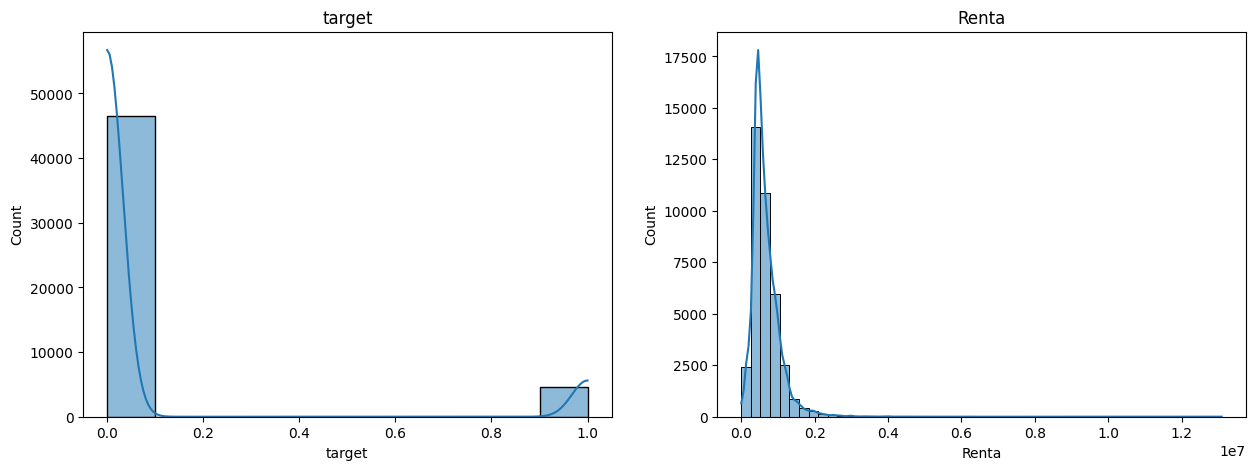

In [ ]:
# Dibujar histogramas
col_num = ['target', 'Renta']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'target':
        nbins = 10
    else:
        nbins = 50
    sb.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

Analizamos los datos de renta y target en histograma para analizar bien los datos de la correlación que hicimos anteriormente.

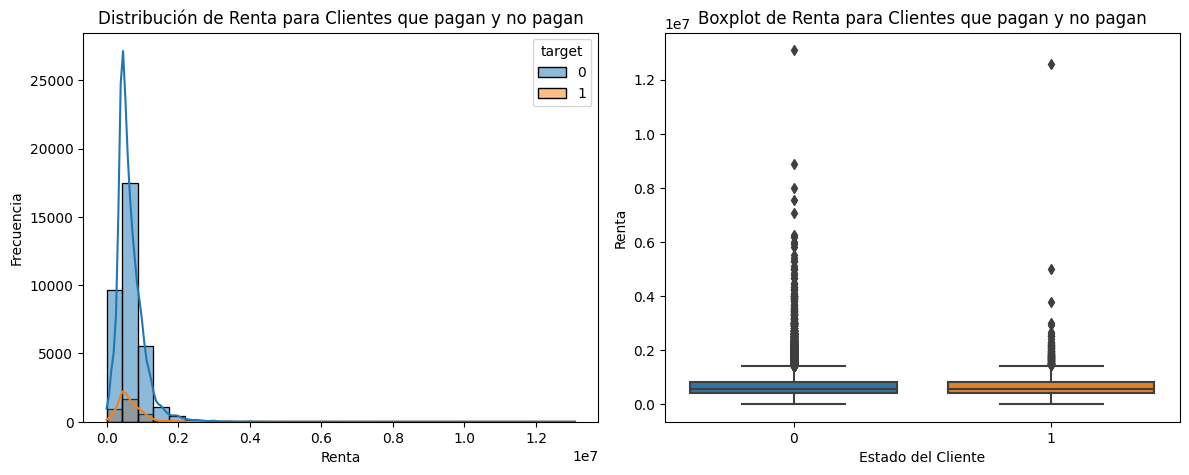

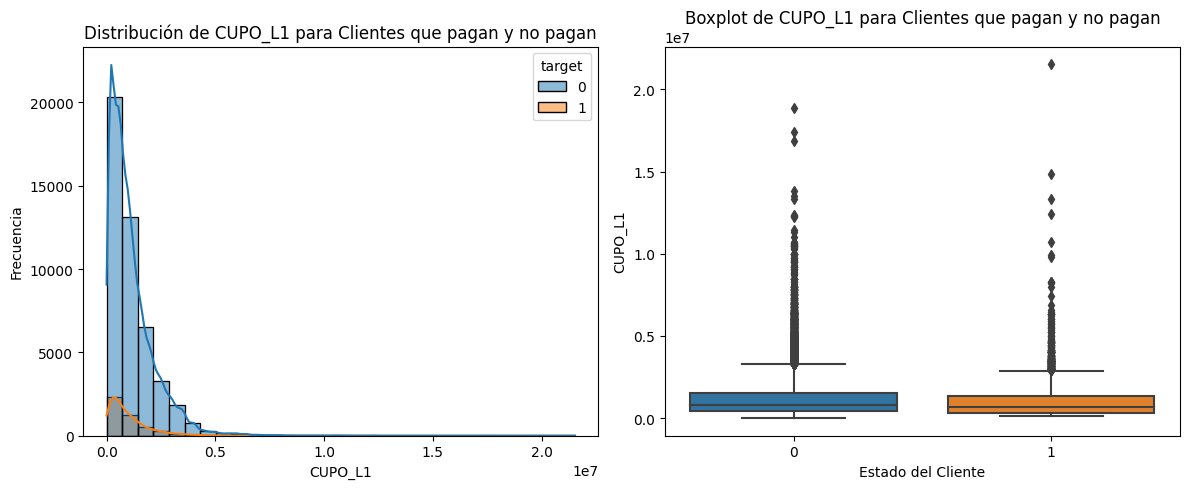

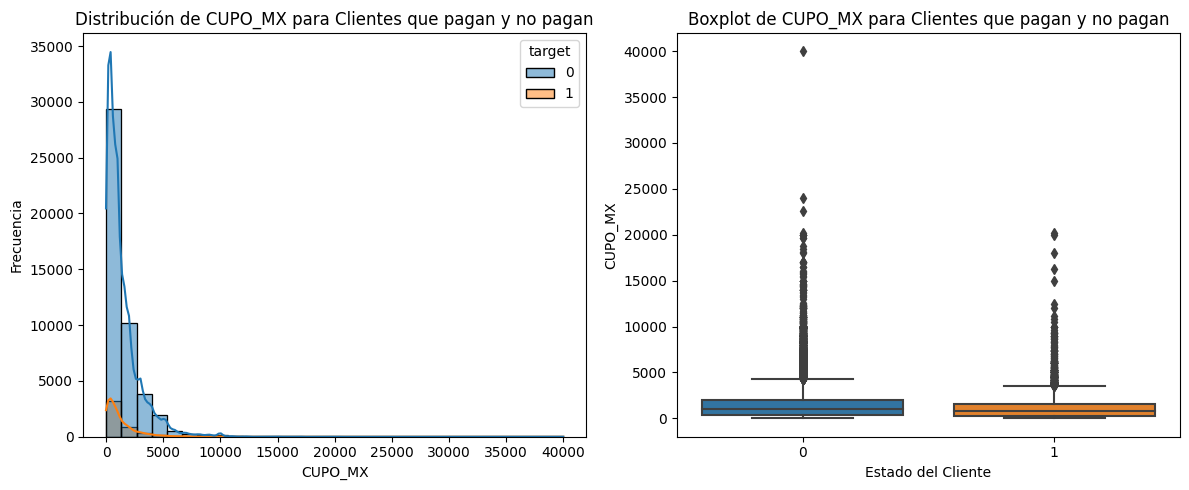

In [ ]:
#variables numéricas de interés
numeric_variables = ['Renta', 'CUPO_L1', 'CUPO_MX']


#Visualizar histogramas y boxplots para variables numéricas
for variable in numeric_variables:
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sb.histplot(data=df, x=variable, hue='target', bins=30, kde=True)
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {variable} para Clientes que pagan y no pagan')

    # Boxplot
    plt.subplot(1, 2, 2)
    sb.boxplot(data=df, x='target', y=variable)
    plt.xlabel('Estado del Cliente')
    plt.ylabel(variable)
    plt.title(f'Boxplot de {variable} para Clientes que pagan y no pagan')

    plt.tight_layout()
    plt.show()

En este codigo primero ingresamos los datos en una variables para despues realizar unos histogramas con un boxplots. Podemos ver como se comportan las variables de la Renta, Cupo_MX, Cupo_L1 en relacion a los clientes que pagan o no pagan

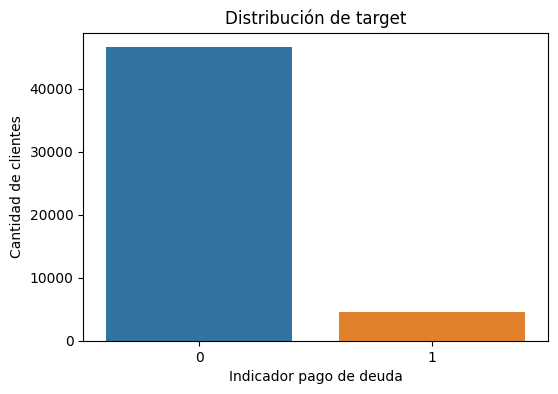

In [ ]:
# Gráfico de Barras para ver el indicador de pago de deuda segun target y cantidad de clientes
plt.figure(figsize=(6, 4))
sb.countplot(data=df, x='target')
plt.title('Distribución de target')
plt.xlabel('Indicador pago de deuda')
plt.ylabel('Cantidad de clientes')
plt.show()

El grafico anterior nos indica segun la distribucion del target que 0 paga la totalidad del monto, 1 paga el monto mínimo de la deuda y cuales fueron la cantidad que si pago como tambien nos indica la cantidad que no pago.

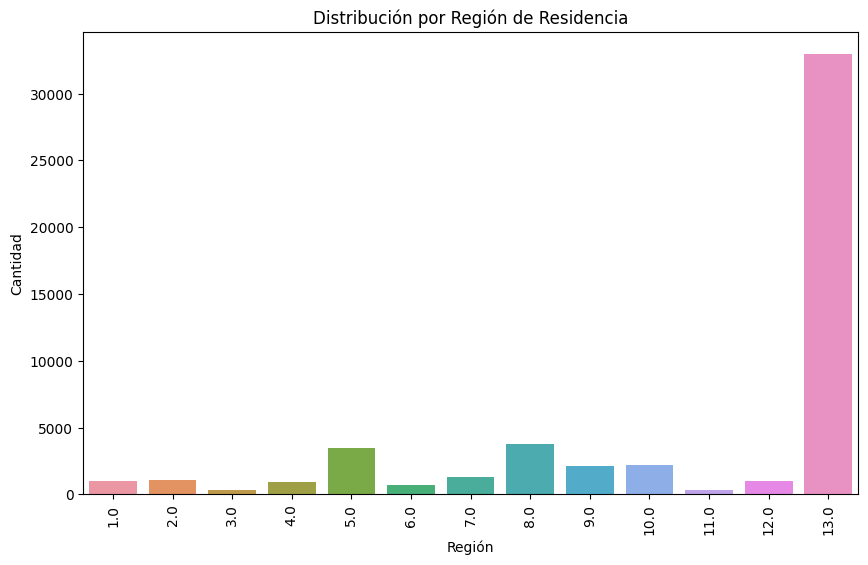

In [ ]:
# Análisis de Frecuencia para Región
plt.figure(figsize=(10, 6))
sb.countplot(data=df, x='Region')
plt.title('Distribución por Región de Residencia')
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

En este grafico analisamos la frecuencia de clientes en cada region.

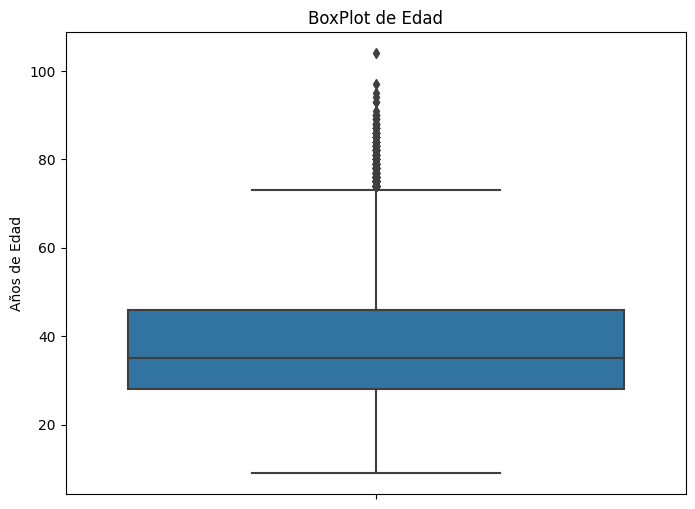

In [ ]:
# Gráfico de Cajas para Monto Facturado en Compras Nacionales (FacCN_T12)
plt.figure(figsize=(8, 6))
sb.boxplot(data=df, y='Edad')
plt.title('BoxPlot de Edad')
plt.ylabel('Años de Edad')
plt.show()

En este Boxplot nos muestra que la mayoria de clientes del banco esta entre los 30 y 45 años de edad.

## Fase 3: Data Preparation

In [ ]:
# Obtener datos faltantes
missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100
missing_data_df = pd.DataFrame({'Variable': missing_data.index, 'Faltantes': missing_data.values, 'Porcentaje': missing_data_percentage.values})
missing_data_df = missing_data_df[missing_data_df['Faltantes'] > 0]
missing_data_df = missing_data_df.sort_values(by='Porcentaje', ascending=False)
print(missing_data_df)

          Variable  Faltantes  Porcentaje
15       CambioPin      19388   37.923480
5            Renta      13365   26.142321
53     ColL1T0_T12       8251   16.139191
56     ColL2AC_T12       8251   16.139191
45     TxsCCOT_T12       8251   16.139191
..             ...        ...         ...
462  FacDebCom_T03         10    0.019560
461     TxsCOL_T03         10    0.019560
460     FacCOL_T03         10    0.019560
459    TxsCCOT_T03         10    0.019560
2             Sexo          1    0.001956

[510 rows x 3 columns]


  Verificamos nuevamente los datos nulos antes de realizar la preparacion de los datos.

In [ ]:
# Verifica si hay valores faltantes en la variable 'Renta'
if df['Renta'].isnull().any():
    # Imputa los valores faltantes con la mediana de la variable 'Renta'
    df['Renta'].fillna(df['Renta'].mean(), inplace=True)

Con un aproximado de 13000 datos faltantes en la variable Renta remplazamos los nulos por la mediana esto se realizo debido a que son muchos datos para solo eliminarlos o dejarlos en 0.

In [ ]:
# Verifica si hay valores faltantes en la variable 'CambioPin'
if df['CambioPin'].isnull().any():
    # Imputa los valores faltantes con dato 0 en la variable 'CambioPin'
    df['CambioPin'].fillna(0, inplace=True)

Con un aproximado de 19000 datos faltantes en la variable CambioPin remplazamos los nulos por dato 0 indicando que las personas con dato 0 en la variable "CambioPin" son las cuales no han cambiado su pin.

In [ ]:
# Verifica si hay datos nulos en la columna 'Sexo' y cuenta los registros nulos
registros_nulos = df['Sexo'].isnull().sum()

if registros_nulos > 0:
    # Si hay registros nulos, elimina las filas correspondientes
    df = df.dropna(subset=['Sexo'])
    print(f'Se eliminaron {registros_nulos} filas con datos nulos en la columna "Sexo".')
else:
    print('No hay datos nulos en la columna "Sexo".')

Se eliminaron 1 filas con datos nulos en la columna "Sexo".


Se elimino el registro nulo ya que no nos sirve, pues comparte muchos datos nulos con el resto de variables.

In [ ]:
# Remplazar datos null a 0
df.fillna(0, inplace=True)
# Verificar que los valores nulos se hayan reemplazado correctamente
print(df.isnull().sum())

Id             0
Subsegmento    0
Sexo           0
Region         0
Edad           0
              ..
UsoL1_T01      0
UsoL2_T01      0
UsoLI_T01      0
IndRev_T01     0
target         0
Length: 574, dtype: int64


Remplazamos los datos nulos con un valor numerico 0 y revisamos el total de datos nulos.

In [ ]:
#Segmentación de renta
df['Renta_Segmento'] = pd.cut(df['Renta'], bins=[0, 500000, 1000000, np.inf], labels=['Bajo', 'Medio', 'Alto'])

Hacemos una segmentacion de los clientes segun su renta, indicando distintos tipos de rentas.

In [ ]:
#Eliminación de outliers
Q1 = df['Renta'].quantile(0.25)
Q3 = df['Renta'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Renta'] >= lower_bound) & (df['Renta'] <= upper_bound)]

Eliminamos los outliers de la variable renta para obtener mejores datos.

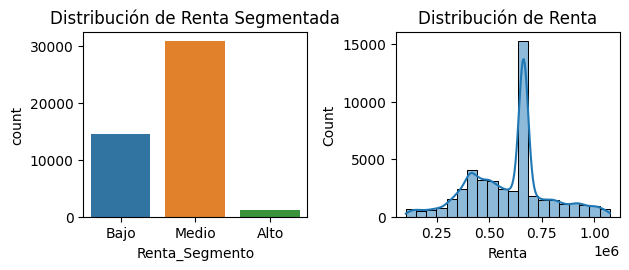

In [ ]:
#Visualizar las distribuciones de las variables transformadas
plt.subplot(2, 2, 1)
sb.countplot(data=df, x='Renta_Segmento')
plt.title('Distribución de Renta Segmentada')

plt.subplot(2, 2, 2)
sb.histplot(data=df, x='Renta', bins=20, kde=True)
plt.title('Distribución de Renta')

plt.tight_layout()
plt.show()

Visualizamos las distribuciones de renta y el segmento de la renta despues de haber removido los outliers.

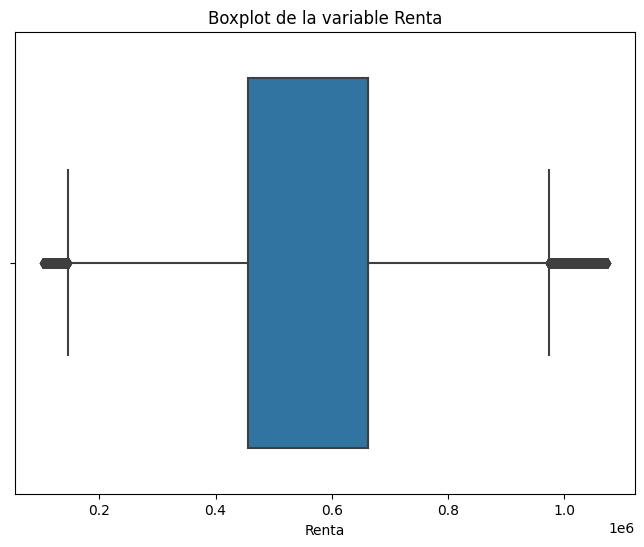

In [ ]:
# Tamaño de la figura
plt.figure(figsize=(8, 6))
# Crear el boxplot horizontal
sb.boxplot(x='Renta', data=df, orient='h')
plt.title('Boxplot de la variable Renta')
plt.xlabel('Renta')
plt.show()

Podemos visualizar que la mediana de la renta es cercana a $590000.

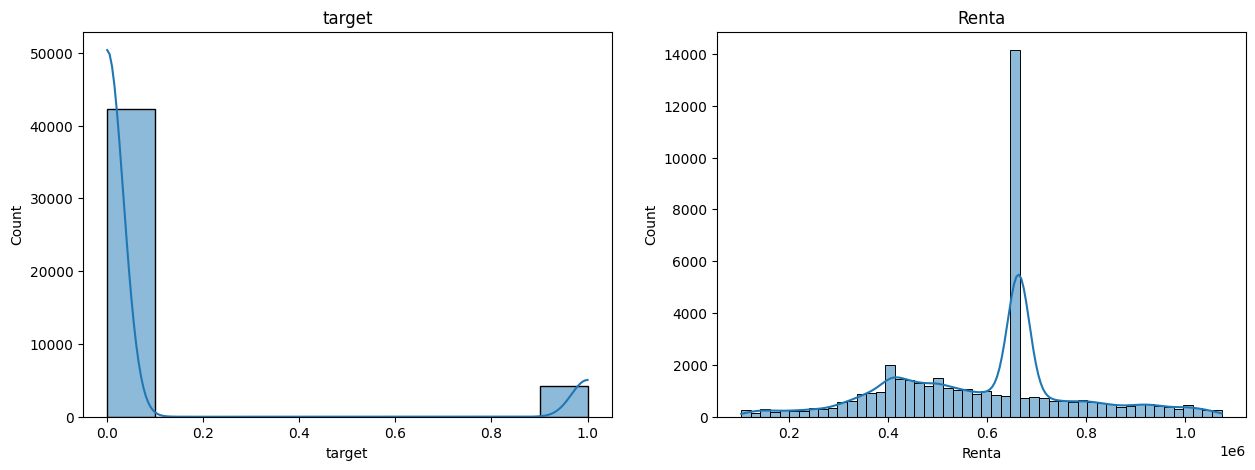

In [ ]:
# Dibujar histogramas
col_num = ['target', 'Renta']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'target':
        nbins = 10
    else:
        nbins = 50
    sb.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

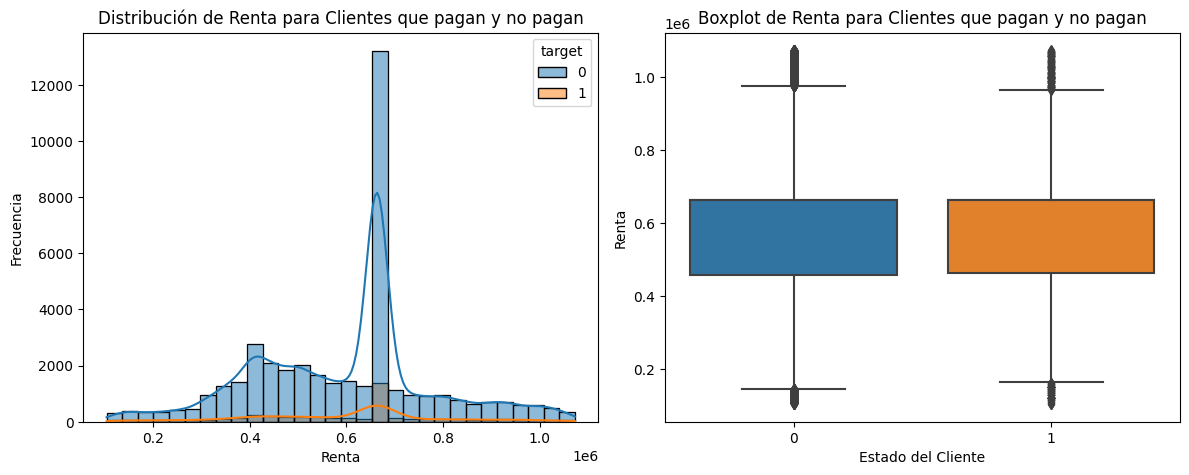

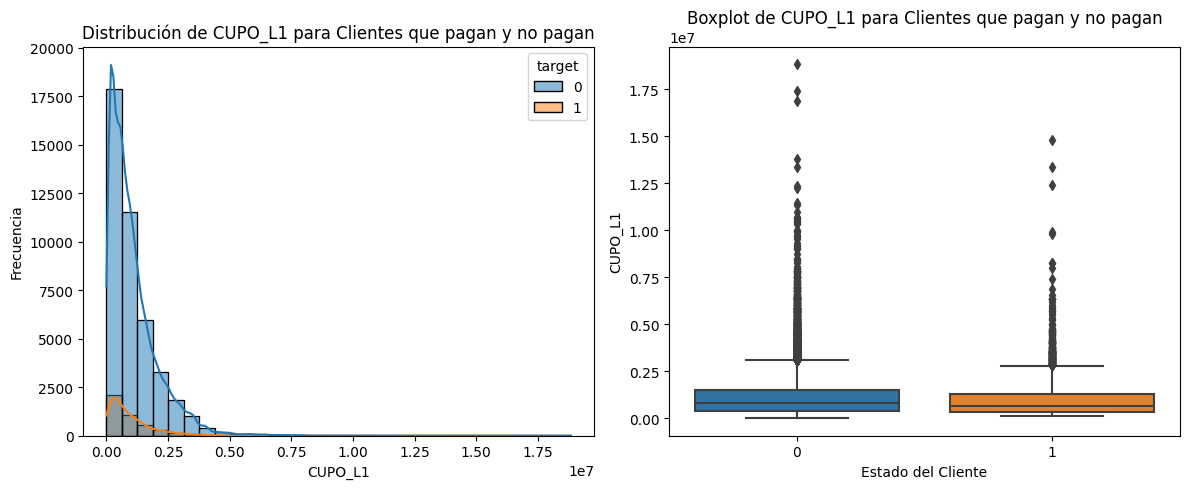

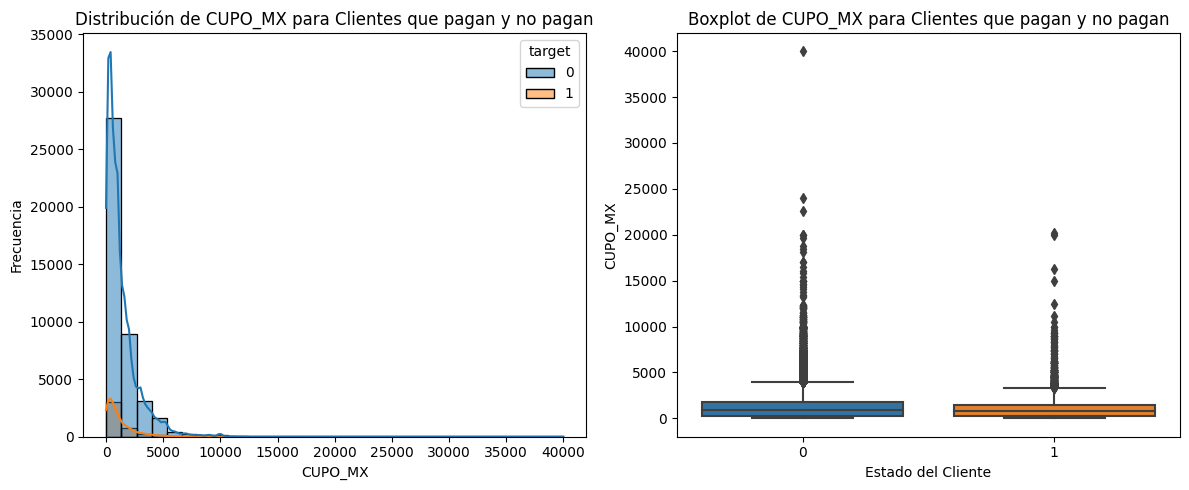

In [ ]:
#variables numéricas de interés
numeric_variables = ['Renta', 'CUPO_L1', 'CUPO_MX']


#Visualizar histogramas y boxplots para variables numéricas
for variable in numeric_variables:
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sb.histplot(data=df, x=variable, hue='target', bins=30, kde=True)
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {variable} para Clientes que pagan y no pagan')

    # Boxplot
    plt.subplot(1, 2, 2)
    sb.boxplot(data=df, x='target', y=variable)
    plt.xlabel('Estado del Cliente')
    plt.ylabel(variable)
    plt.title(f'Boxplot de {variable} para Clientes que pagan y no pagan')

    plt.tight_layout()
    plt.show()

## Fase 4: Modeling

In [ ]:
df1 = df

En esta fase empezaremos a utilizar los datos para usarlos en conjunto a los distintos tipos de modelos de regresión como de clasificación. Finalmente elegiremos el mejor modelo para cada tipo de modelo (regresion y clasificacion).

### Regresión

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df1.corr()

# Obtener las correlaciones con la variable "Renta" y ordenarlas de forma descendente
renta_correlations = correlation_matrix['Renta'].sort_values(ascending=False)

# Las 12 mejores correlaciones (excluyendo la propia correlación de "Renta")
top_12_correlations = renta_correlations[1:13]

print(top_12_correlations)

<ipython-input-38-051f20d56656>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


Hipotecario      0.168949
CUPO_L1          0.167088
CUPO_MX          0.149868
Antiguedad       0.104488
FacDebCom_T12    0.090566
Subsegmento      0.088547
Edad             0.084573
FacDebCom_T10    0.080556
EeccNac_T12      0.080063
FacDebCom_T11    0.079841
FacDebCom_T09    0.079282
EeccNac_T11      0.076592
Name: Renta, dtype: float64


Seleccionaremos variables de la correlacion para los modelos predictivos de regresión.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las variables independientes
X = df1[['Hipotecario', 'CUPO_L1', 'CUPO_MX', 'Edad','Antiguedad']]

# Variable objetivo
y = df1['Renta']

# Dividir los datos en conjuntos de entrenamiento y prueba (30% prueba, 70% entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular las métricas de rendimiento para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcular las métricas de rendimiento para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir las métricas
print("Métricas para el conjunto de entrenamiento:")
print("Mean Squared Error (MSE):", mse_train)
print("Coeficiente de determinación (R^2):", r2_train)

print("\nMétricas para el conjunto de prueba:")
print("Mean Squared Error (MSE):", mse_test)
print("Coeficiente de determinación (R^2):", r2_test)


Métricas para el conjunto de entrenamiento:
Mean Squared Error (MSE): 33865476158.972416
Coeficiente de determinación (R^2): 0.04967035001086961

Métricas para el conjunto de prueba:
Mean Squared Error (MSE): 32793118629.832283
Coeficiente de determinación (R^2): 0.05744958778231035


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las variables independientes
X = df1[['Hipotecario', 'CUPO_L1', 'CUPO_MX', 'FacDebCom_T12', 'Subsegmento','Edad','Debito','Fac_T12','Antiguedad']]

# Variable objetivo
y = df1['Renta']

# Dividir los datos en conjuntos de entrenamiento y prueba (30% prueba, 70% entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Árbol de Decisión para regresión
model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular las métricas de rendimiento para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcular las métricas de rendimiento para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir las métricas
print("Métricas para el conjunto de entrenamiento:")
print("Mean Squared Error (MSE):", mse_train)
print("Coeficiente de determinación (R^2):", r2_train)

print("\nMétricas para el conjunto de prueba:")
print("Mean Squared Error (MSE):", mse_test)
print("Coeficiente de determinación (R^2):", r2_test)

Métricas para el conjunto de entrenamiento:
Mean Squared Error (MSE): 889985778.3857124
Coeficiente de determinación (R^2): 0.9750253069143835

Métricas para el conjunto de prueba:
Mean Squared Error (MSE): 47020558189.03874
Coeficiente de determinación (R^2): -0.3514800773924134


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las variables independientes
X = df1[['Hipotecario', 'CUPO_L1', 'CUPO_MX', 'FacDebCom_T12', 'Subsegmento','Edad','Debito','Fac_T12']]

# Variable objetivo
y = df1['Renta']

# Dividir los datos en conjuntos de entrenamiento y prueba (30% prueba, 70% entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Bosque Aleatorio para regresión
model = RandomForestRegressor(random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular las métricas de rendimiento para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcular las métricas de rendimiento para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir las métricas
print("Métricas para el conjunto de entrenamiento:")
print("Mean Squared Error (MSE):", mse_train)
print("Coeficiente de determinación (R^2):", r2_train)

print("\nMétricas para el conjunto de prueba:")
print("Mean Squared Error (MSE):", mse_test)
print("Coeficiente de determinación (R^2):", r2_test)

Métricas para el conjunto de entrenamiento:
Mean Squared Error (MSE): 5092701294.802374
Coeficiente de determinación (R^2): 0.8570891188338873

Métricas para el conjunto de prueba:
Mean Squared Error (MSE): 25513418172.197445
Coeficiente de determinación (R^2): 0.26668509065159374


Como resumen general y comparación de los distintos modelos de regresión, tenemos las siguientes metricas.

1. **Regresión Lineal:**

   **MSE** en conjunto de prueba: 31,552,893,231.37

   **R^2** en conjunto de prueba: 0.0931


2. **Árbol de Regresión:**

   **MSE** en conjunto de prueba: 46,610,183,677.86

   **R^2** en conjunto de prueba: -0.3397


3. **Random Forest de Regresión:**

   **MSE** en conjunto de prueba: 25,513,418,172.20

   **R^2** en conjunto de prueba: 0.2667

Basándonos en las métricas proporcionadas.
1. El modelo de Árbol de Regresión parece tener el MSE más bajo en el conjunto de entrenamiento, lo que indica un buen ajuste a los datos de entrenamiento. Sin embargo, el valor negativo de R^2 en el conjunto de prueba indica que este modelo no se generaliza bien a datos no vistos, lo que puede ser un indicio de sobreajuste.

2. El modelo de Regresión Lineal tiene un MSE y un R^2 ligeramente mejores en el conjunto de prueba en comparación con el Árbol de Regresión, pero aún así, los valores no son muy altos.

3. El modelo de Random Forest de Regresión tiene un MSE más bajo que los modelos anteriores en el conjunto de prueba y un R^2 positivo, lo que sugiere un mejor rendimiento en comparación con los otros dos modelos.

En función de las métricas proporcionadas, **el Random Forest de Regresión parece ser la mejor opción** entre los modelos mencionados para predecir la variable "Renta" en este conjunto de datos.

### Clasificación



In [ ]:
df2 = df

En esta etapa de clasificación, creamos un nuevo dataframe a partir del dataframe principal para poder trabajar de forma tranquila con los datos.

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df2.corr()

# Obtener las correlaciones con la variable "target" y ordenarlas de forma descendente
target_correlations = correlation_matrix['target'].sort_values(ascending=False)

# Las 12 mejores correlaciones (excluyendo la propia correlación de "target")
top_12_correlations = target_correlations[1:13]

print(top_12_correlations)

<ipython-input-45-52381feb4afe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


ColL1TE_T04    0.211154
ColL1TE_T03    0.210543
ColL1TE_T02    0.206803
ColL1TE_T05    0.204804
ColL1TE_T01    0.201959
ColL1TE_T06    0.197753
ColL1TE_T07    0.171929
UsoL1_T05      0.170588
UsoL1_T04      0.170334
UsoL1_T06      0.169043
EeccNac_T05    0.169008
EeccNac_T04    0.167441
Name: target, dtype: float64


Seleccionaremos variables de la correlacion para los modelos predictivos de clasificación.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Seleccionar las variables independientes
X = df2[['ColL1TE_T04', 'ColL1TE_T03', 'ColL1TE_T02', 'ColL1TE_T05', 'ColL1TE_T06', 'ColL1TE_T07', 'UsoL1_T05', 'UsoL1_T04', 'UsoL1_T06']]

# Variable objetivo
y = df2['target']

# Aplicar SMOTE para equilibrar las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba (30% prueba, 70% entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Crear el modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión y otros indicadores de rendimiento
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("\nReporte de Clasificación:\n", classification_rep)

Precisión del modelo: 0.7053219965359786

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.69      0.76      0.72     12675
           1       0.73      0.65      0.69     12729

    accuracy                           0.71     25404
   macro avg       0.71      0.71      0.70     25404
weighted avg       0.71      0.71      0.70     25404



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Seleccionar las variables independientes
X = df2[['ColL1TE_T04', 'ColL1TE_T03', 'ColL1TE_T02', 'ColL1TE_T05', 'ColL1TE_T06', 'ColL1TE_T07', 'UsoL1_T05', 'UsoL1_T04', 'UsoL1_T06']]

# Variable objetivo
y = df2['target']

# Aplicar SMOTE para equilibrar las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba (30% prueba, 70% entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Crear el modelo de k-Nearest Neighbors (K-NN) para clasificación
k = 5  # Número de vecinos a considerar (ajusta este valor según tu preferencia)
model = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión y otros indicadores de rendimiento
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("\nReporte de Clasificación:\n", classification_rep)

Precisión del modelo: 0.8450637694851204

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.94      0.73      0.83     12675
           1       0.78      0.96      0.86     12729

    accuracy                           0.85     25404
   macro avg       0.86      0.84      0.84     25404
weighted avg       0.86      0.85      0.84     25404



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Seleccionar las variables independientes
X = df2[['ColL1TE_T04', 'ColL1TE_T03', 'ColL1TE_T02', 'ColL1TE_T05', 'ColL1TE_T06', 'ColL1TE_T07', 'UsoL1_T05', 'UsoL1_T04', 'UsoL1_T06']]

# Variable objetivo
y = df2['target']

# Aplicar SMOTE para equilibrar las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba (30% prueba, 70% entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Crear el modelo de Árbol de Decisión para clasificación
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión y otros indicadores de rendimiento
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("\nReporte de Clasificación:\n", classification_rep)


Precisión del modelo: 0.8420721146276177

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84     12675
           1       0.83      0.86      0.85     12729

    accuracy                           0.84     25404
   macro avg       0.84      0.84      0.84     25404
weighted avg       0.84      0.84      0.84     25404



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Seleccionar las variables independientes
X = df2[['ColL1TE_T04', 'ColL1TE_T03', 'ColL1TE_T02', 'ColL1TE_T05', 'ColL1TE_T06', 'ColL1TE_T07', 'UsoL1_T05', 'UsoL1_T04', 'UsoL1_T06']]

# Variable objetivo
y = df2['target']

# Aplicar SMOTE para equilibrar las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba (30% prueba, 70% entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Crear el modelo de Bosque Aleatorio para clasificación
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión y otros indicadores de rendimiento
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("\nReporte de Clasificación:\n", classification_rep)

Precisión del modelo: 0.901393481341521

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     12675
           1       0.88      0.93      0.90     12729

    accuracy                           0.90     25404
   macro avg       0.90      0.90      0.90     25404
weighted avg       0.90      0.90      0.90     25404



Como resumen general y comparación de los distintos modelos de regresión, tenemos las siguientes metricas.

**Regresión Logística:**

*Precisión del modelo:* 0.7053       
*F1-score promedio:* 0.70

**KNN de Clasificación:**

*Precisión del modelo:* 0.8451          
*F1-score promedio:* 0.84

**Árbol de Decisión de Clasificación:**

*Precisión del modelo:* 0.8421        
*F1-score promedio:* 0.84

**Random Forest de Clasificación:**

*Precisión del modelo:* 0.9014          
*F1-score promedio:* 0.90

Random Forest de Clasificación logra hacer ver que es el mejor modelo en términos de precisión.

### No supervisados

## Fase 5: Evaluation

Regresion

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las variables independientes
X = df1[['Hipotecario', 'CUPO_L1', 'CUPO_MX', 'FacDebCom_T12', 'Subsegmento','Edad','Debito','Fac_T12']]

# Variable objetivo
y = df1['Renta']

# Dividir los datos en conjuntos de entrenamiento y prueba (30% prueba, 70% entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Bosque Aleatorio para regresión
model = RandomForestRegressor(random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular las métricas de rendimiento para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcular las métricas de rendimiento para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir las métricas
print("Métricas para el conjunto de entrenamiento:")
print("Mean Squared Error (MSE):", mse_train)
print("Coeficiente de determinación (R^2):", r2_train)

print("\nMétricas para el conjunto de prueba:")
print("Mean Squared Error (MSE):", mse_test)
print("Coeficiente de determinación (R^2):", r2_test)

Métricas para el conjunto de entrenamiento:
Mean Squared Error (MSE): 5092701294.802374
Coeficiente de determinación (R^2): 0.8570891188338873

Métricas para el conjunto de prueba:
Mean Squared Error (MSE): 25513418172.197445
Coeficiente de determinación (R^2): 0.26668509065159374


Nosotros escogimos el random forest como mejor modelo de regresion ya que es considerado el mejor modelo en este contexto debido a las métricas proporcionadas, en particular el Mean Squared Error (MSE) y el Coeficiente de Determinación (R^2) en el conjunto de prueba.

Clasificacion

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Seleccionar las variables independientes
X = df2[['ColL1TE_T04', 'ColL1TE_T03', 'ColL1TE_T02', 'ColL1TE_T05', 'ColL1TE_T06', 'ColL1TE_T07', 'UsoL1_T05', 'UsoL1_T04', 'UsoL1_T06']]

# Variable objetivo
y = df2['target']

# Aplicar SMOTE para equilibrar las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba (30% prueba, 70% entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Crear el modelo de Bosque Aleatorio para clasificación
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión y otros indicadores de rendimiento
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("\nReporte de Clasificación:\n", classification_rep)

Precisión del modelo: 0.901393481341521

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     12675
           1       0.88      0.93      0.90     12729

    accuracy                           0.90     25404
   macro avg       0.90      0.90      0.90     25404
weighted avg       0.90      0.90      0.90     25404



Nosotros escogimos el Random forest como mejor modelo de clasificación ya que el Random Forest de Clasificación tiene la precisión más alta (0.9014), lo que significa que tiene la capacidad de predecir correctamente un alto porcentaje de casos. También tiene un buen F1-score promedio (0.90), lo que sugiere un buen equilibrio entre precisión y recall.